In [3]:
import pandas as pd
import numpy as np


In [ ]:
bucket = 'moodify_bucket'
csv = 'lyric_dataset.csv'
gcs_path = f'gs://{bucket}/{csv}'
print(gcs_path)
df = pd.read_csv(gcs_path)
df.head()

gs://moodify_bucket/lyric_dataset.csv


In [17]:
df.columns, df.shape

(Index(['Unnamed: 0', 'id', 'lyrics', 'is_english', 'genres_list', 'popularity',
        'release_date', 'artist_id', 'artist_name', 'artist_popularity',
        'artist_followers', 'artist_picture_url', 'danceability', 'energy',
        'key', 'loudness', 'mode', 'speechiness', 'acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'uri',
        'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
       dtype='object'),
 (488355, 29))

In [19]:
X = df[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence','tempo']]
X.head(4)

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.658,0.475,7.0,-11.703,0.0292,0.52100,0.006700,0.176,0.685,153.851
1,0.500,0.704,0.0,-8.797,0.0695,0.12500,0.000018,0.138,0.722,119.463
2,0.732,0.750,11.0,-6.366,0.2310,0.00264,0.000000,0.109,0.401,155.096
3,0.687,0.918,7.0,-4.676,0.0392,0.00211,0.000013,0.344,0.747,110.060


In [1]:
df['word_count'] = df['lyrics'].apply(lambda x: len(x.split()))
df_sorted = df.sort_values(by='word_count')


NameError: name 'df' is not defined

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
km = KMeans(n_clusters=7)

In [26]:
X.shape

(488355, 10)

In [30]:
X = X.dropna()
X.shape

(478355, 10)

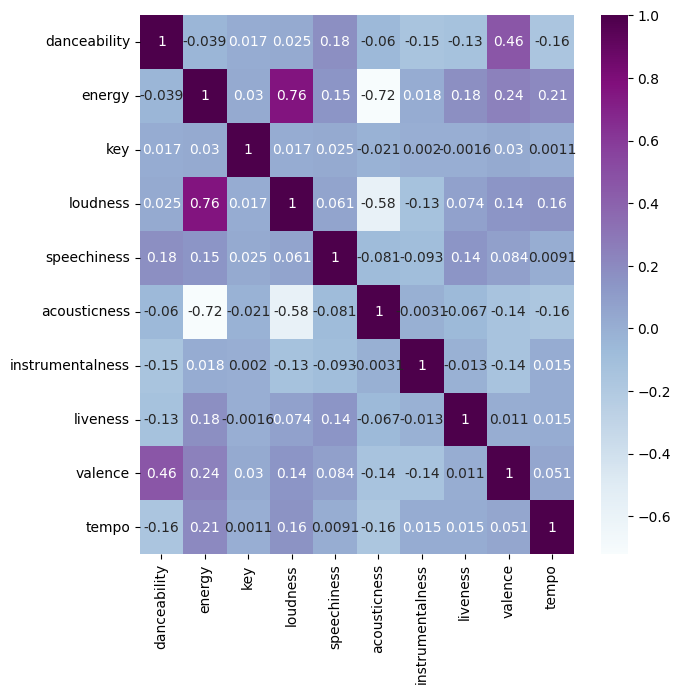

In [44]:
plt.figure(figsize=(7,7))

sns.heatmap(X.corr(),
            annot = True,
            annot_kws = {"fontsize":10},
            cmap='BuPu');

In [31]:
km.fit(X)

/Users/victorlagache/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7)

In [33]:
km.cluster_centers_.shape, km.labels_


((7, 10), array([4, 2, 4, ..., 4, 1, 1], dtype=int32))

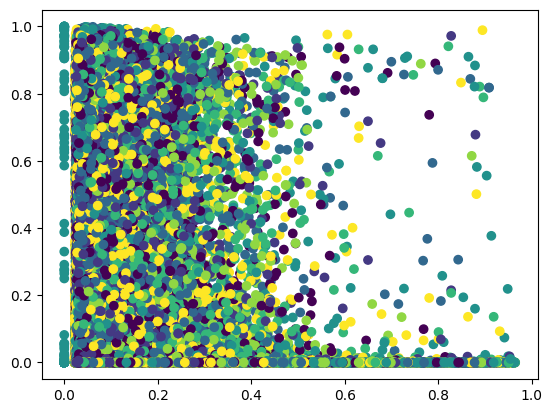

In [38]:
plt.scatter(X.iloc[:,4], X.iloc[:,6], c=km.labels_)
